In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np
import time

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 37
np.random.seed(seed)
print(seed)

37


In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
# del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, 
P_e1_val, P_e2, P_e3 = [ 1.43824549482149, 1.040964945989, 0.757527164510807]
del1_val0 = 0.2750992166488899
w1_val0 = 1.0000100730942103
del2_val0 = 0.6151155440467728
w2_val0 = 0.9999682086377139
del3_val0 = 0.48972701132205004
w3_val0 = 0.9999631117244979


In [7]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)

In [8]:
cos = np.cos
sin = np.sin

In [9]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [10]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [11]:
n_grid = 20
range_min = 8
range_max = 10
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [12]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss/10000


In [13]:
import numpy as np
from scipy.optimize import minimize
import random

# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])
theta = np.random.uniform(0, 2 * np.pi, size=(3,3))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])
start_time = time.time()

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


# SAVE PARAMETERS
# Generate a random string for the file name
random_string = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=8))

# Get the current time as a timestamp
timestamp = int(time.time())

# Combine the timestamp and random string to create the file name
file_name = f"{range_min}-{range_max}_data_{timestamp}_{random_string}.npz"

# Save the data to a file using np.savez
np.savez(file_name, w=w, theta=theta)

print(f"Data saved to file: {file_name}")

Current loss: 20615.272969604353
Current loss: 6265.569713100427
Current loss: 1383.6338637558918
Current loss: 621.2673644093146
Current loss: 335.0842807740223
Current loss: 198.23567896659108
Current loss: 151.29396161199776
Current loss: 132.98623880723767
Current loss: 99.47755812266298
Current loss: 92.01981483334114
Current loss: 89.32672817633748
Current loss: 86.10347085792614
Current loss: 53.57441999428675
Current loss: 48.52685435890921
Current loss: 40.67911817543407
Current loss: 28.172290879226413
Current loss: 14.856011547505757
Current loss: 10.098905529907384
Current loss: 4.526911810984736
Current loss: 2.420522337434619
Current loss: 2.046991245481741
Current loss: 1.4657855920862368
Current loss: 0.962393661671761
Current loss: 0.8843327371297289
Current loss: 0.7677596073873031
Current loss: 0.6724380649175846
Current loss: 0.6335513319045307
Current loss: 0.6055241071809649
Current loss: 0.570305167525435
Current loss: 0.5152136545752287
Current loss: 0.430439799

In [14]:
del1_target_values=[0.2750992166488899, 0.275503238436186, 0.2758906540660096, 0.2762621308728716, 0.27661831397425485, 0.2769598262706139, 0.27728726844537527, 0.27760121896493745, 0.27790223407867076, 0.2781908478189174, 0.27846757200099154, 0.27873289622317904, 0.2789872878667378, 0.2792311920958977, 0.2794650318578603, 0.2796892355693125, 0.27990419463138055, 0.2801102856474826, 0.28030787328900153, 0.2804973072795233]
omega1_target_values=[1.0000103959538091, 1.0000099684088979, 1.00000955832045, 1.0000091650008176, 1.000008787783504, 1.000008426023165, 1.0000080790956078, 1.0000077463977919, 1.0000074273478292, 1.000007121384983, 1.0000068279696688, 1.0000065465834538, 1.0000062767290578, 1.000006017930352, 1.0000057697323597, 1.000005531754742, 1.0000053035683114, 1.000005084760197, 1.000004874945717, 1.0000046737616586]
del2_target_values=[0.6151155440467728, 0.6140696374795037, 0.6130662203041701, 0.612103622381386, 0.6111802274428345, 0.6102944730912687, 0.6094448508005109, 0.6086299059154533, 0.6078482376520578, 0.6070984990973556, 0.6063793972094477, 0.6056896928175047, 0.6050282006217669, 0.604393789193544, 0.6037853809752156, 0.6032018862097814, 0.602642303272236, 0.6021056690369145, 0.601591050695034, 0.6010975528223498]
omega2_target_values=[0.9999730941582992, 0.9999741874014157, 0.9999752372249722, 0.9999762451908581, 0.9999772128301844, 0.999978141643282, 0.999979033099703, 0.9999798886382203, 0.999980709666828, 0.9999814975627401, 0.9999822536723922, 0.9999829793114405, 0.999983675764762, 0.9999843442864544, 0.9999849860998363, 0.9999856015731444, 0.9999861919137116, 0.9999867582853866, 0.9999873016569185, 0.999987822900838]

del3_target_values=[0.48972701132205004, 0.48911727733437815, 0.488532937787713, 0.4879729383123518, 0.48743626179101623, 0.48692192835885306, 0.4864289954034339, 0.485956557564755, 0.4855037467352376, 0.4850697320597278, 0.48465371993549644, 0.4842549540122391, 0.48387271519207636, 0.48350632162955354, 0.48315512873164085, 0.48281847617670953, 0.48249576217286605, 0.48218641196414036, 0.4818898691176199, 0.4816056008516666]
omega3_target_values=[0.9999843062179078, 0.9999849605976864, 0.9999855873352975, 0.9999861875753829, 0.9999867624294317, 0.9999873129757815, 0.9999878402596174, 0.9999883452929731, 0.9999888290547305, 0.999989292490619, 0.9999897365132163, 0.9999901620019482, 0.9999905698030889, 0.9999909607297599, 0.9999913355619313, 0.9999916945682571, 0.9999920385242447, 0.9999923681653982, 0.9999926841055937, 0.9999929868959316]

In [15]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

20
20
0.2804973072795233


Text(0.5, 1.0, 'Fitting Data')

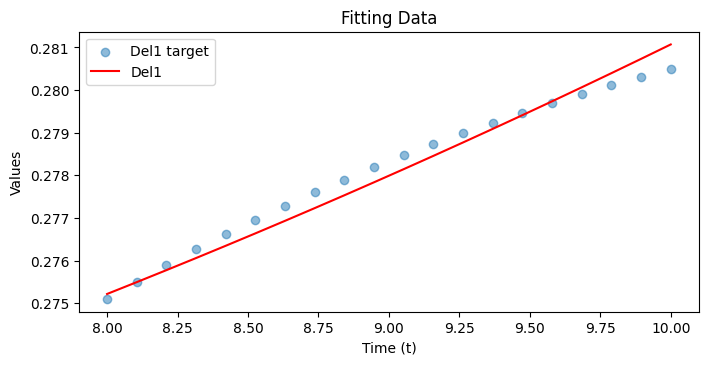

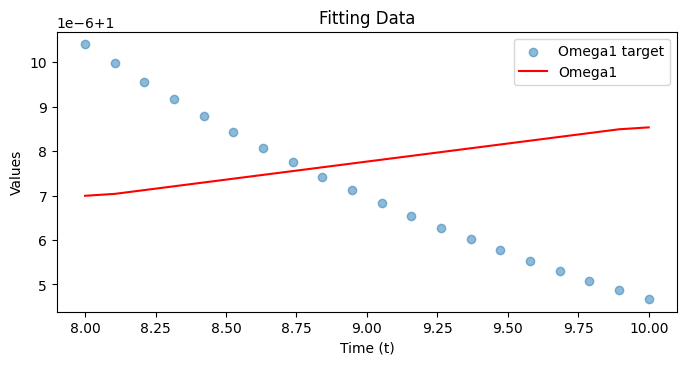

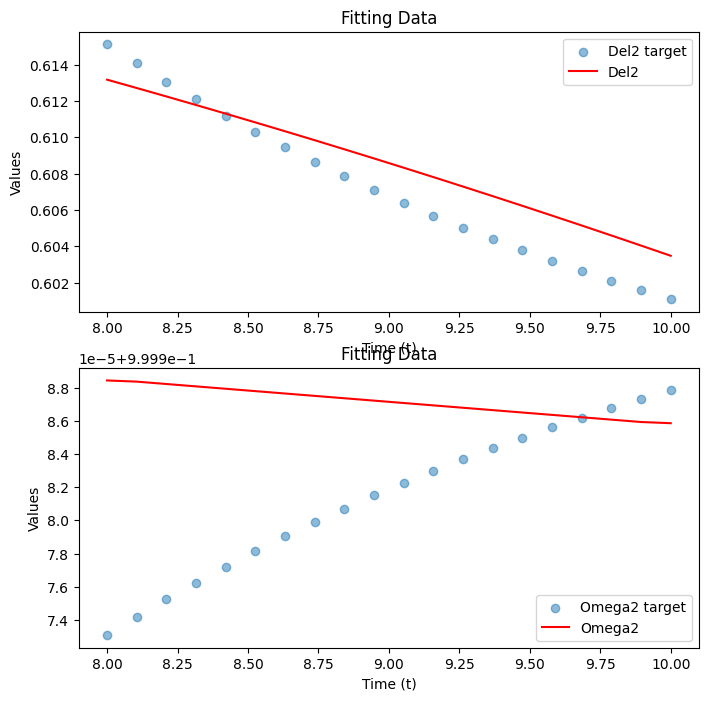

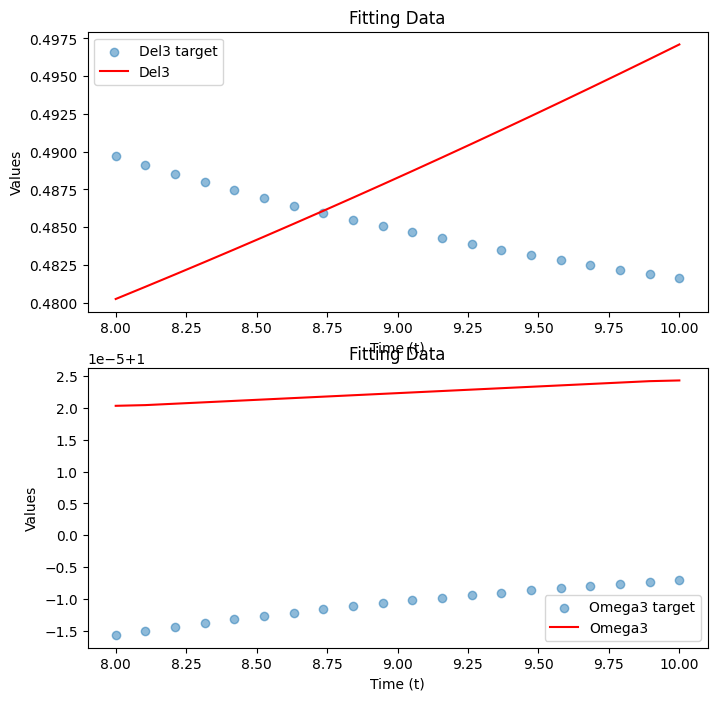

In [16]:
import matplotlib.pyplot as plt

# t2_data = [t_data[i] for i in range(0,len(t_data),2) ]
# del1_target_values_2 =  [del1_target_values[i] for i in range(0,len(del1_target_values),2) ]
# print(len(t2_data))
# print(len(del1_target_values_2))


print(len(t_data))
print(len(del1_target_values))



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = [f(theta1,w1,ti) for ti in t_data]
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(del1_target_values[-1])


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = [f(theta2,w2,ti) for ti in t_data]
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




In [17]:
print(delta_pred3)
print(del3_target_values)

[tensor(0.4802475, requires_grad=True), tensor(0.48105534, requires_grad=True), tensor(0.48187198, requires_grad=True), tensor(0.48269741, requires_grad=True), tensor(0.48353164, requires_grad=True), tensor(0.48437467, requires_grad=True), tensor(0.48522649, requires_grad=True), tensor(0.48608711, requires_grad=True), tensor(0.48695652, requires_grad=True), tensor(0.48783473, requires_grad=True), tensor(0.48872174, requires_grad=True), tensor(0.48961754, requires_grad=True), tensor(0.49052214, requires_grad=True), tensor(0.49143553, requires_grad=True), tensor(0.49235772, requires_grad=True), tensor(0.4932887, requires_grad=True), tensor(0.49422849, requires_grad=True), tensor(0.49517706, requires_grad=True), tensor(0.49613444, requires_grad=True), tensor(0.4971006, requires_grad=True)]
[0.48972701132205004, 0.48911727733437815, 0.488532937787713, 0.4879729383123518, 0.48743626179101623, 0.48692192835885306, 0.4864289954034339, 0.485956557564755, 0.4855037467352376, 0.4850697320597278,

In [20]:
print('del1_val0 =',del1_target_values[-1])
print('w1_val0 =',omega_pred1[-1])
print('del2_val0 =',del2_target_values[-1])
print('w2_val0 =',omega_pred2[-1])
print('del3_val0 =',del3_target_values[-1])
print('w3_val0 =',omega_pred3[-1])


del1_val0 = 0.2804973072795233
w1_val0 = 1.000008531760719
del2_val0 = 0.6010975528223498
w2_val0 = 0.9999858506594181
del3_val0 = 0.4816056008516666
w3_val0 = 1.000024347006089


In [19]:
print('del1=',[float(delta_pred1[i]) for i in range(len(delta_pred1))])
print('del2=',[float(delta_pred2[i]) for i in range(len(delta_pred2))])
print('del3=',[float(delta_pred3[i]) for i in range(len(delta_pred3))])
print('omega1=',[float(omega_pred1[i]) for i in range(len(omega_pred1))])
print('omega2=',[float(omega_pred2[i]) for i in range(len(omega_pred2))])
print('omega3=',[float(omega_pred3[i]) for i in range(len(omega_pred3))])


del1= [0.275217291057552, 0.27549484096989196, 0.27577578078685894, 0.2760601105084529, 0.27634783013467384, 0.2766389396655217, 0.27693343910099655, 0.2772313284410984, 0.27753260768582716, 0.27783727683518294, 0.2781453358891656, 0.2784567848477753, 0.278771623711012, 0.27908985247887563, 0.2794114711513662, 0.2797364797284838, 0.2800648782102283, 0.2803966665965998, 0.2807318448875983, 0.2810704130832237]
del2= [0.613175136368259, 0.6127158208355655, 0.6122508288238682, 0.6117801603331672, 0.6113038153634625, 0.610821793914754, 0.6103340959870417, 0.6098407215803258, 0.609341670694606, 0.6088369433298826, 0.6083265394861553, 0.6078104591634245, 0.6072887023616897, 0.6067612690809514, 0.6062281593212092, 0.6056893730824634, 0.6051449103647137, 0.6045947711679605, 0.6040389554922033, 0.6034774633374425]
del3= [0.4802474996265266, 0.4810553418079655, 0.48187197991854774, 0.48269741395827315, 0.4835316439271418, 0.48437466982515376, 0.4852264916523089, 0.48608710940860733, 0.48695652309